# Introduction
    
Due to rapid growth in field of cashless or digital 
transactions, credit cards are widely used in all 
around the world. Credit cards providers are 
issuing thousands of cards to their customers.
 Providers have to ensure all the credit card users 
should be genuine and real. Any mistake in issuing 
a card can be reason of financial crises. 
Due to rapid growth in cashless transaction,
 the chances of number of fraudulent transactions can also increasing.
 A Fraud transaction can be identified by analyzing various
 behaviors of credit card customers from previous 
transaction history datasets. If any deviation
 is noticed in spending behavior from available patterns, 
it is possibly of fraudulent transaction. 
Data mining and machine learning techniques are widely used in credit card 
fraud detection. In this article we are presenting review 
of various data mining and machine learning methods
 which are widely used for credit card fraud detections and  complete this project end to end from Data Understanding to deploy Model via API .  
    
    
 

<a id=0></a>
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:#1777C4; border:0' role="tab" aria-controls="home">

<center>CRISP-DM Methodology</center></h3>

* [Buissness Understanding](#1)
* [Data Understanding](#2)
* [Data Preparation](#3)
* [Data Modeling](#4)   
* [Data Evaluation](#5)
    

In this section we overview our selected method for engineering our solution. CRISP-DM stands for Cross-Industry Standard Process for Data Mining. It is an open standard guide that describes common approaches that are used by data mining experts. CRISP-DM includes descriptions of the typical phases of a project, including tasks details and provides an overview of the data mining lifecycle. The lifecycle model consists of six phases with arrows indicating the most important and frequent dependencies between phases. The sequence of the phases is not strict. In fact, most projects move back and forth between phases as necessary. It starts with business understanding, and then moves to data understanding, data preparation, modelling, evaluation, and deployment. The CRISP-DM model is flexible and can be customized easily.
## Buissness Understanding

    Tasks:

    1.Determine business objectives

    2.Assess situation

    3.Determine data mining goals

    4.Produce project plan

## Data Understanding
     Tasks:

    1.Collect data

    2.Describe data

    3.Explore data    

## Data Preparation
    
    Tasks:
    
    1.Data selection

    2.Data preprocessing

    3.Feature engineering

    4.Dimensionality reduction

            Steps:

            Data cleaning

            Data integration

            Data sampling

            Data dimensionality reduction

            Data formatting

            Data transformation

            Scaling

            Aggregation

            Decomposition

## Data Modeling :

Modeling is the part of the Cross-Industry Standard Process for Data Mining (CRISP-DM) process model that i like best. Our data is already in good shape, and now we can search for useful patterns in our data.

   Tasks:
    
    1. Select modeling technique Select technique

    2. Generate test design

    3. Build model

    4. Assess model

## Data Evaluation :
    
    Tasks:

    1.Evaluate Result

    2.Review Process

    3.Determine next steps

<a id=1></a>
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:#1777C4; border:0' role="tab" aria-controls="home">
<center>Buissness Understanding</center></h3>


There may be two types of questions:

**A.Technical Questions:**
  
Can ML be a solution to the problem?

    
                Do we have THE data?
                Do we have all necessary related data?
                Is there enough amount of data to develop algorithm?
                Is data collected in the right way?
                Is data saved in the right format?
                Is the access to information guaranteed?

Can we satisfy all the Business Questions by means of ML?

**B.Business Questions:**
    
What are the organization's business goals?
    
                To reduce cost and increase revenue? 
                To increase efficiencies?
                To avoid risks? To improve quality?
    
Is it worth to develop ML?
    
                In short term? In long term?
                What are the success metrics?
                Can we handle the risk if the project is unsuccessful?
    
Do we have the resources?
    
                Do we have enough time to develop ML?
                Do we have a right talented team?


    
WE are provided a synthetic dataset for a mobile payments application. In this dataset, you are provided the sender and recipient of a transaction as well as whether transactions are tagged as fraud or not fraud. Your task is to build a fraud detection API that can be called to predict whether or not a transaction is fraudulent.
You can download the dataset here:https://www.kaggle.com/bannourchaker/frauddetection
    
You are expected to build a REST API that predicts whether a given transaction is fraudulent or not. You are also to assume that the previous API calls are to be stored in order to engineer
features relevant to finding fraud. The API calls will include the time step of the transaction, so you can assume that a transaction happens sequentially within the same time step.
For example, if I make the following transactions in the same time step:  
    

    
The first transaction is unlikely to be fraudulent, since anon is initiating a normal transfer.
However, multiple successive transfers of the same amount in the same hour is potentially fraudulent, since anon’s account might have been taken over by a fraudster. On the first API call,your model is unlikely to classify the transaction as fraudulent. However, on the fifth call, it’s likely that it will be tagged as fraudulent.
The REST API only has 1 endpoint /is-fraud that takes in a POST request:
    
The body is expected to receive the following fields(which are also the fields that can be found in your dataset:
The following is a sample body when making a POST request to your
    
    
            {
        "step":1,
        "type":"PAYMENT",
        "amount":9839.64,
        "nameOrig":"C1231006815",
        "oldbalanceOrig":170136.0,
        "newbalanceOrig":160296.36,
        "nameDest":"M1979787155",
        "oldbalanceDest":0.0,
        "newbalanceDest":0.0
        }
    
    
Your API is expected to return a JSON object with a boolean field isFraud. You may find a
sample response below:
    
    {"isFraud": true}
    
**summary:**
we are expecting the following:
    
- 1. Deployed REST API:
    
    a. As mentioned above, we would need an API that takes in a POST request for the
    /is-fraud url and returns a prediction on whether or not a transaction is
    fraudulent.
    
    b. Your REST API should be public for us to call the API and evaluate the accuracy
    of your model
    
    c. Given the nature of the data, your REST API will likely need to take into account
    previous transactions, so make sure it is able to take note of transactions from
    your training dataset as well as previous API calls.

- 2. Model
    
    a. We are expecting a machine learning model that can correctly classify whether or
    not a transaction is fraudulent.

**What is the objective of the machine learning model?**

We aim to predict  the real transactions fraud  and the fraud estimated by our model. We will evaluate model performance with the:

   - F beta score
    
   - ROC AUC score
    
   - PR AUC score | Average precision
    
    
## Step 1: Import helpful libraries

In [1]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import matplotlib.gridspec as gridspec
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import warnings
# Preparation  
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer, StandardScaler,Normalizer,RobustScaler,MaxAbsScaler,MinMaxScaler,QuantileTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import KBinsDiscretizer
# Import StandardScaler from scikit-learn

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer,IterativeImputer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_transformer,ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline,FeatureUnion
from sklearn.manifold import TSNE
# Import train_test_split()
# Metrics
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.metrics import make_scorer,f1_score
from sklearn.metrics import mean_squared_error,classification_report
from sklearn.metrics import roc_curve,confusion_matrix
from datetime import datetime, date
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.linear_model import LogisticRegression

#import tensorflow as tf 
#from tensorflow.keras import layers
#from tensorflow.keras.callbacks import EarlyStopping
#from tensorflow.keras.callbacks import LearningRateScheduler
#import smogn
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
# For training random forest model
import lightgbm as lgb
from scipy import sparse
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
# Model selection
from sklearn.model_selection import StratifiedKFold,TimeSeriesSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, GroupKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
# Feature Selection 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,f_classif,chi2
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import mutual_info_classif,VarianceThreshold


from lightgbm import LGBMClassifier,LGBMRegressor
from catboost import CatBoostRegressor, CatBoostClassifier
from xgboost import XGBClassifier,XGBRegressor
from sklearn import set_config
from itertools import combinations
# Cluster :
from sklearn.cluster import MiniBatchKMeans
#from yellowbrick.cluster import KElbowVisualizer
#import smong 
import category_encoders as ce
import warnings
import optuna 
from joblib import Parallel, delayed
import joblib 
from sklearn import set_config
from typing import List, Optional, Union
set_config(display='diagram')
warnings.filterwarnings('ignore')


## Step 2: Load the data
Complete guid to read data : 
Next, we'll load the training and test data.

In [2]:
%%time
# import lux
# Load the training data
train = pd.read_csv("../input/frauddetection/transactions_train.csv")
# Preview the data
train.head(3)

CPU times: user 12.6 s, sys: 1.69 s, total: 14.3 s
Wall time: 17.9 s


,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1



<a id=2></a>
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:#1777C4; border:0' role="tab" aria-controls="home">
<center>Data Understanding</center></h3>


### Explore the data/Analysis 

We will analyse the following:

    The target variable
    
    Variable types (categorical and numerical)
    
    Numerical variables
        Discrete
        Continuous
        Distributions
        Transformations

    Categorical variables
        Cardinality
        Rare Labels
        Special mappings

    Null Data

    Text data 
    
    wich columns will we use
    
    IS there outliers that can destory our algo
    
    IS there diffrent range of data
    
    Curse of dimm...
    
This Step is done here : [https://www.kaggle.com/bannourchaker/frauddetection-part1-eda/edit](http://)

# Convert Dtypes :

In [3]:
# Convert Dtypes :
train[train.select_dtypes(['int64','int16','float32','float64','int8']).columns] = train[train.select_dtypes(['int64','int16','float32','float64','int8']).columns].apply(pd.to_numeric)
train[train.select_dtypes(['object','category']).columns] = train.select_dtypes(['object','category']).apply(lambda x: x.astype('category'))

## Define the model features and target

### Extract X and y 

In [4]:
# Pour le train test
target= "isFraud"
X = train.drop(target, axis='columns')# axis=1
y = train[target]
del train 

# What should we do for each colmun

**Separate features by dtype**

Next we’ll separate the features in the dataframe by their datatype. There are a few different ways to achieve this. I’ve used the select_dtypes() function to obtain specific data types by passing in np.number to obtain the numeric data and exclude=['np.number'] to return the categorical data. Appending .columns to the end returns an Index list containing the column names. For the categorical features, we don’t want to include the target income column, so I’ve dropped that.

**Cat Features**





In [5]:
# select non-numeric columns
cat_columns = X.select_dtypes(exclude=['int64','int16','float32','float64','int8']).columns

**Num Features**



In [6]:
# select the float columns
num_columns = X.select_dtypes(include=['int64','int16','float32','float64','int8']).columns

In [7]:
all_columns = (num_columns.append(cat_columns))
print(cat_columns)
print(num_columns)
print(all_columns)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')
Index(['step', 'amount', 'oldbalanceOrig', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest'],
      dtype='object')
Index(['step', 'amount', 'oldbalanceOrig', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'type', 'nameOrig', 'nameDest'],
      dtype='object')


# check that we have all column

In [8]:
if set(all_columns) == set(X.columns):
    print('Ok')
else:
    # Let's see the difference 
    print('in all_columns but not in  train  :', set(all_columns) - set(X.columns))
    print('in X.columns   but not all_columns :', set(X.columns) - set(all_columns))

Ok


<a id=3></a>
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:#1777C4; border:0' role="tab" aria-controls="home">
<center>Data Preparation</center></h3>


## Data preprocessing

Data preprocessing comes after you've cleaned up your data and after you've done some exploratory analysis to understand your dataset. Once you understand your dataset, you'll probably have some idea about how you want to model your data. Machine learning models in Python require numerical input, so if your dataset has categorical variables, you'll need to transform them. Think of data preprocessing as a prerequisite for modeling.
This Step is Done Here :
[https://www.kaggle.com/bannourchaker/frauddetection-part2-preparation/edit](http://)



In [9]:
class ColumnsSelector(BaseEstimator, TransformerMixin):
    def __init__(self, positions):
        self.positions = positions

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        #return np.array(X)[:, self.positions]
        return X.loc[:, self.positions] 
########################################################################
class CustomLogTransformer(BaseEstimator, TransformerMixin):
    # https://towardsdatascience.com/how-to-write-powerful-code-others-admire-with-custom-sklearn-transformers-34bc9087fdd
    def __init__(self):
        self._estimator = PowerTransformer()

    def fit(self, X, y=None):
        X_copy = np.copy(X) + 1
        self._estimator.fit(X_copy)

        return self

    def transform(self, X):
        X_copy = np.copy(X) + 1

        return self._estimator.transform(X_copy)

    def inverse_transform(self, X):
        X_reversed = self._estimator.inverse_transform(np.copy(X))

        return X_reversed - 1  

class TemporalVariableTransformer(BaseEstimator, TransformerMixin):
    # Temporal elapsed time transformer

    def __init__(self, variables, reference_variable):
        
        if not isinstance(variables, list):
            raise ValueError('variables should be a list')
        
        self.variables = variables
        self.reference_variable = reference_variable

    def fit(self, X, y=None):
        # we need this step to fit the sklearn pipeline
        return self

    def transform(self, X):

       # so that we do not over-write the original dataframe
        X = X.copy()
        
        for feature in self.variables:
            X[feature] = X[self.reference_variable] - X[feature]

        return X
class CustomImputer(BaseEstimator, TransformerMixin) : 
    def __init__(self, variable, by) : 
            #self.something enables you to include the passed parameters
            #as object attributes and use it in other methods of the class
            self.variable = variable
            self.by = by

    def fit(self, X, y=None) : 
        self.map = X.groupby(self.by)[variable].mean()
        #self.map become an attribute that is, the map of values to
        #impute in function of index (corresponding table, like a dict)
        return self

def transform(self, X, y=None) : 
    X[variable] = X[variable].fillna(value = X[by].map(self.map))
    #Change the variable column. If the value is missing, value should 
    #be replaced by the mapping of column "by" according to the map you
    #created in fit method (self.map)
    return X

    # categorical missing value imputer
class Mapper(BaseEstimator, TransformerMixin):

    def __init__(self, variables, mappings):

        if not isinstance(variables, list):
            raise ValueError('variables should be a list')

        self.variables = variables
        self.mappings = mappings

    def fit(self, X, y=None):
        # we need the fit statement to accomodate the sklearn pipeline
        return self

    def transform(self, X):
        X = X.copy()
        for feature in self.variables:
            X[feature] = X[feature].map(self.mappings)

        return X  
    
##########################################################################
class CountFrequencyEncoder(BaseEstimator, TransformerMixin):
    #temp = df['card1'].value_counts().to_dict()
    #df['card1_counts'] = df['card1'].map(temp)
    def __init__(
        self,
        encoding_method: str = "count",
        variables: Union[None, int, str, List[Union[str, int]]] = None,
        keep_variable=True,
                  ) -> None:

        self.encoding_method = encoding_method
        self.variables = variables
        self.keep_variable=keep_variable

    def fit(self, X: pd.DataFrame, y: Optional[pd.Series] = None):
        """
        Learn the counts or frequencies which will be used to replace the categories.
        Parameters
        ----------
        X: pandas dataframe of shape = [n_samples, n_features]
            The training dataset. Can be the entire dataframe, not just the
            variables to be transformed.
        y: pandas Series, default = None
            y is not needed in this encoder. You can pass y or None.
        """
        self.encoder_dict_ = {}

        # learn encoding maps
        for var in self.variables:
            if self.encoding_method == "count":
                self.encoder_dict_[var] = X[var].value_counts().to_dict()

            elif self.encoding_method == "frequency":
                n_obs = float(len(X))
                self.encoder_dict_[var] = (X[var].value_counts() / n_obs).to_dict()
        return self

    def transform(self, X: pd.DataFrame) -> pd.DataFrame:
        # replace categories by the learned parameters
        X = X.copy()
        for feature in self.encoder_dict_.keys():
            if self.keep_variable:
                X[feature+'_fq_enc'] = X[feature].map(self.encoder_dict_[feature])
            else:
                X[feature] = X[feature].map(self.encoder_dict_[feature])
        return X[self.variables].to_numpy()
#################################################   
class FeaturesEngineerGroup(BaseEstimator, TransformerMixin):
    def __init__(self,groupping_method ="mean",
                   variables=  "amount",
                   groupby_variables = "nameOrig"                         
                 ) :
        self.groupping_method = groupping_method
        self.variables=variables
        self.groupby_variables=groupby_variables
        
    def fit(self, X, y=None):
        """
        Learn the mean or median of  amount of each client which will be used to create new feature for each unqiue client in order to undersatant thier behavior .
        Parameters
        ----------
        X: pandas dataframe of shape = [n_samples, n_features]
        The training dataset. Can be the entire dataframe, not just the
        variables to be transformed.
        y: pandas Series, default = None
        y is not needed in this encoder. You can pass y or None.
        """
        self.group_amount_dict_ = {}
        #df.groupby('card1')['TransactionAmt'].agg(['mean']).to_dict()
        #temp = df.groupby('card1')['TransactionAmt'].agg(['mean']).rename({'mean':'TransactionAmt_card1_mean'},axis=1)
        #df = pd.merge(df,temp,on='card1',how='left')
        #target_mean = df_train.groupby(['id1', 'id2'])['target'].mean().rename('avg')
        #df_test = df_test.join(target_mean, on=['id1', 'id2'])
        #lifeExp_per_continent = gapminder.groupby('continent').lifeExp.mean()
        # learn mean/medain 
        #for groupby in self.groupby_variables:
         #   for var in self.variables:
        if self.groupping_method == "mean":
            self.group_amount_dict_[self.variables] =X.fillna(np.nan).groupby([self.groupby_variables])[self.variables].agg(['mean']).to_dict()
        elif self.groupping_method == "median":
            self.group_amount_dict_[self.variables] =X.fillna(np.nan).groupby([self.groupby_variables])[self.variables].agg(['median']).to_dict()
        else:
            print('error , chose mean or median')
        return self
    
    def transform(self, X: pd.DataFrame) -> pd.DataFrame:
        X = X.copy()
        #for col in self.variables:
         #   for agg_type in self.groupping_method:
        new_col_name =  self.variables+'_Transaction_'+ self.groupping_method
        X[new_col_name] = X[self.groupby_variables].map(self.group_amount_dict_[ self.variables][self.groupping_method])
        return X[new_col_name].to_numpy().reshape(-1,1)    
    
################################################   
class FeaturesEngineerGroup2(BaseEstimator, TransformerMixin):
    def __init__(self,groupping_method ="mean",
                   variables=  "amount",
                   groupby_variables = "nameOrig"                         
                 ) :
        self.groupping_method = groupping_method
        self.variables=variables
        self.groupby_variables=groupby_variables
        
    def fit(self, X, y=None):
        """
        Learn the mean or median of  amount of each client which will be used to create new feature for each unqiue client in order to undersatant thier behavior .
        Parameters
        ----------
        X: pandas dataframe of shape = [n_samples, n_features]
        The training dataset. Can be the entire dataframe, not just the
        variables to be transformed.
        y: pandas Series, default = None
        y is not needed in this encoder. You can pass y or None.
        """
        X = X.copy()
        self.group_amount_dict_ = {}
        #df.groupby('card1')['TransactionAmt'].agg(['mean']).to_dict()
        #temp = df.groupby('card1')['TransactionAmt'].agg(['mean']).rename({'mean':'TransactionAmt_card1_mean'},axis=1)
        #df = pd.merge(df,temp,on='card1',how='left')
        #target_mean = df_train.groupby(['id1', 'id2'])['target'].mean().rename('avg')
        #df_test = df_test.join(target_mean, on=['id1', 'id2'])
        #lifeExp_per_continent = gapminder.groupby('continent').lifeExp.mean()
        # learn mean/medain 
        #for groupby in self.groupby_variables:
         #   for var in self.variables:

        print('we have {} unique clients'.format(X[self.groupby_variables].nunique()))
        new_col_name =  self.variables+'_Transaction_'+ self.groupping_method    
        X[new_col_name] = X.groupby([self.groupby_variables])[[self.variables]].transform(self.groupping_method)
        X = X.drop_duplicates(['nameOrig'])
    
        self.group_amount_dict_ = dict(zip(X[self.groupby_variables], X[new_col_name]))
        del X
        #print('we have {} unique mean amount : one for each client'.format(len(self.group_amount_dict_)))
        return self
    
    def transform(self, X: pd.DataFrame) -> pd.DataFrame:
        X = X.copy()
        #for col in self.variables:
         #   for agg_type in self.groupping_method:
        new_col_name =  self.variables+'_Transaction_'+ self.groupping_method
        X[new_col_name] = X[self.groupby_variables].map(self.group_amount_dict_)
        return X[new_col_name].to_numpy().reshape(-1,1)   
    
############################################  
class FeaturesEngineerCumCount(BaseEstimator, TransformerMixin):
    def __init__(self,group_one ="step",
                   group_two=  "nameOrig"                       
                 ) :
        self.group_one =group_one
        self.group_two=group_two
        
    def fit(self, X, y=None):
        """
        """
        return self
    
    def transform(self, X: pd.DataFrame) -> pd.DataFrame:
        X = X.copy()
        new_col_name =  self.group_two+'_Transaction_count'
        X[new_col_name] = X.groupby([self.group_one, self.group_two])[[self.group_two]].transform('count')
        return X[new_col_name].to_numpy().reshape(-1,1)

 # Baseline Pipe :
 This is  the first round to get the best preprocess steps 

In [10]:
# Cat columns: 
cat_pipe = Pipeline([
                     ('Encoder',ce.target_encoder.TargetEncoder())
                     
                    ])
#Num_columns:
num_pipe = Pipeline([('imputer', SimpleImputer(strategy='median',add_indicator=False)),
                     ('scaler', QuantileTransformer())
                    ])
#Feature Union fitting training data :
preprocessor = FeatureUnion(transformer_list=[('cat', cat_pipe),
                                              ('num', num_pipe)])
# Using ColumnTransformer:
data_cleaning = ColumnTransformer([
    ('cat_columns',  cat_pipe, cat_columns ),
    ('num_columns', num_pipe , num_columns)
])
# preprocessor.fit(X_train)
#############################
# Complete Pipe 
def create_pipeline(model,preprocessor,FeaturesEngineer=None):
    pipeline = Pipeline([ 
        ('pre', preprocessor),
        ('lgbm', model)
    ])
    return pipeline
preprocessor 

FeatureUnion(transformer_list=[('cat',
                                Pipeline(steps=[('Encoder', TargetEncoder())])),
                               ('num',
                                Pipeline(steps=[('imputer',
                                                 SimpleImputer(strategy='median')),
                                                ('scaler',
                                                 QuantileTransformer())]))])

# Advanced Pipe :
This pipe include features engineer+ some advanced preprocessing steps for each columns.

In [11]:
# complete pipe :
# select the float/cat columns
#cat_feautres = X.select_dtypes(include=['object','category']).columns
#num_features = X.select_dtypes(exclude=['object','category']).columns
#Define vcat pipeline
features_cum_count=['step','nameOrig']
features_groupby_amount=['amount','nameOrig']
features_frequency_orig_dest=['nameOrig','nameDest']
features_cum_count_pipe = Pipeline([
                     ('transformer_Encoder', FeaturesEngineerCumCount())
                    ])
features_groupby_pipe = Pipeline([
                     ('transformer_group_amount_mean', FeaturesEngineerGroup2()),
                     ('transformer_group_scaler', PowerTransformer())
                    ])
features_frequency_pipe = Pipeline([
                     ('Encoder', CountFrequencyEncoder(variables=['nameOrig','nameDest'],encoding_method ="frequency", keep_variable=False))
                    ])
type_pipe= Pipeline([
                     ('transformer_Encoder', ce.cat_boost.CatBoostEncoder())
                    ])
num_features0=[  'amount',  'oldbalanceOrig', 'newbalanceOrig' ,'oldbalanceDest', 'newbalanceDest']
#Define vnum pipeline
num_pipe = Pipeline([
                     ('scaler', PowerTransformer()),
                    ])
#Featureunion fitting training data
preprocessor = FeatureUnion(transformer_list=[('cum_count', features_cum_count_pipe),
                                              ('mean_amount', features_groupby_pipe),
                                              ('frequency_dest_orig', features_frequency_pipe),
                                              ('trans_type', type_pipe),
                                              ('num', num_pipe)])
data_preparing= ColumnTransformer([
    ('cum_count', features_cum_count_pipe, features_cum_count ),
    ('mean_amount', features_groupby_pipe, features_groupby_amount ),
    ('frequency_dest_orig', features_frequency_pipe, features_frequency_orig_dest ),
    ('trans_type', type_pipe, ['type'] ),
    ('num', num_pipe, num_features0)
], remainder='drop')
data_preparing

ColumnTransformer(transformers=[('cum_count',
                                 Pipeline(steps=[('transformer_Encoder',
                                                  FeaturesEngineerCumCount())]),
                                 ['step', 'nameOrig']),
                                ('mean_amount',
                                 Pipeline(steps=[('transformer_group_amount_mean',
                                                  FeaturesEngineerGroup2()),
                                                 ('transformer_group_scaler',
                                                  PowerTransformer())]),
                                 ['amount', 'nameOrig']),
                                ('frequency_dest_orig',
                                 Pipeline(steps=[('Encoder',
                                                  CountFrequencyEncoder(encoding_method='frequency',
                                                                        keep_variable=False,
                                                                        variables=['nameOrig',
                                                                                   'nameDest']))]),
                                 ['nameOrig', 'nameDest']),
                                ('trans_type',
                                 Pipeline(steps=[('transformer_Encoder',
                                                  CatBoostEncoder())]),
                                 ['type']),
                                ('num',
                                 Pipeline(steps=[('scaler',
                                                  PowerTransformer())]),
                                 ['amount', 'oldbalanceOrig', 'newbalanceOrig',
                                  'oldbalanceDest', 'newbalanceDest'])])

<a id=4></a>
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:#1777C4; border:0' role="tab" aria-controls="home">
<center>Modeling</center></h3>


Modeling is the part of the Cross-Industry Standard Process for Data Mining (CRISP-DM) process model that i like best. Our data is already in good shape, and now we can search for useful patterns in our data.


Tasks

1. Select modeling technique Select technique

2. Generate test design

3. Build model

4. Assess model

# Tuning The best Model: 
# Optuna

## Basic Concepts


So, We use the terms study and trial as follows:

    Study: optimization based on an objective function
    
    Trial: a single execution of the objective function


Let's build our optimization function using optuna
This function uses LGBMRegressor model, takes

    the data
    the target
    trial(How many executions we will do)
    #### and returns average precision

Notes:

    Note that I used some LGBMClassifier hyperparameters from LGBM official site.
    So if you like to add more parameters or change them, check this links:
    https://github.com/solegalli/optuna-examples/blob/main/lightgbm/lightgbm_simple.py
    https://www.kaggle.com/hamidrezabakhtaki/xgboost-catboost-lighgbm-optuna-final-submission
    Also I used early_stopping_rounds to avoid overfiting

In [12]:
data_preparing.fit(X,y)
x_pre = data_preparing.transform(X)

we have 6341907 unique clients


In [13]:
def objectivelgbm(trial,data=x_pre,target=y):
    # Optuna+cv :
    #https://www.kaggle.com/hamidrezabakhtaki/xgboost-catboost-lighgbm-optuna-final-submission
    # https://www.kaggle.com/prashant111/lightgbm-classifier-in-python
    # https://www.kaggle.com/tunguz/tps-09-21-histgradientboosting-with-optuna
    X_train,X_test, y_train,  y_test = train_test_split(data, target, 
                                                        test_size=0.2,
                                                        random_state=42,shuffle=False)
    params = {"n_estimators" : trial.suggest_int("n_estimators" , 1000 , 15000),
             "max_depth" : trial.suggest_int("max_depth", 2,20),
             "learning_rate": trial.suggest_float("learning_rate",0.005 ,0.2),
             #"reg_alpha": trial.suggest_float("reg_alpha" , 0.001 , 10 ),
             #"reg_lambda" : trial.suggest_float("reg_lambda" , 0.001 , 10),
             "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
             "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
             "num_leaves": trial.suggest_int("num_leaves", 2, 256),
             #"num_leaves":trial.suggest_int("num_leaves" , 50 ,500),
             "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
             "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
             "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
             "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
             #"min_data_per_group":trial.suggest_int("min_data_per_group",50,200),
             #"min_child_samples":trial.suggest_int("min_child_samples",5,200),
             #"colsample_bytree":trial.suggest_float("colsample_bytree",0.1 ,0.8),
             "objective": "binary",
             #"metric": "binary_logloss",
             "verbosity": -1,
             "boosting_type": "gbdt",
             "random_state": 228,
             "metric": "auc",
             #"device": "gpu",
             'tree_method': "gpu_hist",
             }
    
    model  = LGBMClassifier(**params)
    
    model.fit( X_train, y_train,
              eval_set=[(X_test, y_test)],
              early_stopping_rounds=250,
              verbose=False
             )
    #pipeline_model_lgbm.fit(X_train,y_train)
    preds = model.predict_proba(X_test)[:,1]
    #oof[test_idx] = preds
    average_precesion = average_precision_score(y_true= y_test, y_score= preds)
    return average_precesion


All thing is ready So let's start 🏄‍¶

    Note that the objective of our fuction is to maximize the 'average_precesion' that's why I set direction='maximize'
    you can vary n_trials(number of executions)

In [14]:
study_lgbm = optuna.create_study(direction="maximize")
study_lgbm.optimize(objectivelgbm ,n_trials=20)

[I 2021-12-01 18:15:03,370] A new study created in memory with name: no-name-06f6a428-a93d-4a73-9684-56040da3025b


[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] lambda_l1 is set=3.4962828584814966e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.4962828584814966e-05
[LightGBM] [Warning] bagging_fraction is set=0.8221472985958689, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8221472985958689
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.6454897715616401, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6454897715616401
[LightGBM] [Warning] lambda_l2 is set=0.1916742187105248, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1916742187105248


[I 2021-12-01 18:21:47,602] Trial 0 finished with value: 0.971316969383737 and parameters: {'n_estimators': 9800, 'max_depth': 15, 'learning_rate': 0.02065884690955479, 'lambda_l1': 3.4962828584814966e-05, 'lambda_l2': 0.1916742187105248, 'num_leaves': 56, 'feature_fraction': 0.6454897715616401, 'bagging_fraction': 0.8221472985958689, 'bagging_freq': 7, 'min_child_samples': 58}. Best is trial 0 with value: 0.971316969383737.


[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] lambda_l1 is set=0.0003368492074348658, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0003368492074348658
[LightGBM] [Warning] bagging_fraction is set=0.9686245499529765, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9686245499529765
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.5361382006976815, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5361382006976815
[LightGBM] [Warning] lambda_l2 is set=1.5923206256824431, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5923206256824431


[I 2021-12-01 18:22:54,523] Trial 1 finished with value: 0.7411962268044152 and parameters: {'n_estimators': 6905, 'max_depth': 2, 'learning_rate': 0.08265847927798163, 'lambda_l1': 0.0003368492074348658, 'lambda_l2': 1.5923206256824431, 'num_leaves': 39, 'feature_fraction': 0.5361382006976815, 'bagging_fraction': 0.9686245499529765, 'bagging_freq': 1, 'min_child_samples': 84}. Best is trial 0 with value: 0.971316969383737.


[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] lambda_l1 is set=8.009911656623228, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.009911656623228
[LightGBM] [Warning] bagging_fraction is set=0.7583663971782197, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7583663971782197
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.4898393692711713, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4898393692711713
[LightGBM] [Warning] lambda_l2 is set=2.619988585016313e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.619988585016313e-08


[I 2021-12-01 18:25:00,250] Trial 2 finished with value: 0.8138214212101307 and parameters: {'n_estimators': 7268, 'max_depth': 10, 'learning_rate': 0.03586456145370473, 'lambda_l1': 8.009911656623228, 'lambda_l2': 2.619988585016313e-08, 'num_leaves': 46, 'feature_fraction': 0.4898393692711713, 'bagging_fraction': 0.7583663971782197, 'bagging_freq': 3, 'min_child_samples': 18}. Best is trial 0 with value: 0.971316969383737.


[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] lambda_l1 is set=0.0026569623467237965, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0026569623467237965
[LightGBM] [Warning] bagging_fraction is set=0.6657441659052908, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6657441659052908
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6393375195945167, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6393375195945167
[LightGBM] [Warning] lambda_l2 is set=0.003982874486583073, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.003982874486583073


[I 2021-12-01 18:26:56,260] Trial 3 finished with value: 0.8298130712052508 and parameters: {'n_estimators': 12311, 'max_depth': 7, 'learning_rate': 0.09442577284191278, 'lambda_l1': 0.0026569623467237965, 'lambda_l2': 0.003982874486583073, 'num_leaves': 221, 'feature_fraction': 0.6393375195945167, 'bagging_fraction': 0.6657441659052908, 'bagging_freq': 1, 'min_child_samples': 7}. Best is trial 0 with value: 0.971316969383737.


[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] lambda_l1 is set=4.834076222163734e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.834076222163734e-06
[LightGBM] [Warning] bagging_fraction is set=0.9809372544907793, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9809372544907793
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.5261628707765836, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5261628707765836
[LightGBM] [Warning] lambda_l2 is set=1.0959336985020718, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0959336985020718


[I 2021-12-01 18:46:14,116] Trial 4 finished with value: 0.9640851552847651 and parameters: {'n_estimators': 10972, 'max_depth': 16, 'learning_rate': 0.036310556143209764, 'lambda_l1': 4.834076222163734e-06, 'lambda_l2': 1.0959336985020718, 'num_leaves': 137, 'feature_fraction': 0.5261628707765836, 'bagging_fraction': 0.9809372544907793, 'bagging_freq': 2, 'min_child_samples': 59}. Best is trial 0 with value: 0.971316969383737.


[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] lambda_l1 is set=1.8642671758056794e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8642671758056794e-06
[LightGBM] [Warning] bagging_fraction is set=0.580905498134197, subsample=1.0 will be ignored. Current value: bagging_fraction=0.580905498134197
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.6699768865358893, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6699768865358893
[LightGBM] [Warning] lambda_l2 is set=0.002483558019804668, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.002483558019804668


[I 2021-12-01 18:47:53,892] Trial 5 finished with value: 0.6288914310181835 and parameters: {'n_estimators': 14961, 'max_depth': 4, 'learning_rate': 0.07624351384700472, 'lambda_l1': 1.8642671758056794e-06, 'lambda_l2': 0.002483558019804668, 'num_leaves': 177, 'feature_fraction': 0.6699768865358893, 'bagging_fraction': 0.580905498134197, 'bagging_freq': 2, 'min_child_samples': 63}. Best is trial 0 with value: 0.971316969383737.


[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] lambda_l1 is set=0.02662379829289252, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02662379829289252
[LightGBM] [Warning] bagging_fraction is set=0.4675734568886043, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4675734568886043
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.502496722916478, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.502496722916478
[LightGBM] [Warning] lambda_l2 is set=0.5559229169431625, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5559229169431625


[I 2021-12-01 18:55:42,510] Trial 6 finished with value: 0.9603113543858038 and parameters: {'n_estimators': 7831, 'max_depth': 10, 'learning_rate': 0.07624690314506748, 'lambda_l1': 0.02662379829289252, 'lambda_l2': 0.5559229169431625, 'num_leaves': 236, 'feature_fraction': 0.502496722916478, 'bagging_fraction': 0.4675734568886043, 'bagging_freq': 1, 'min_child_samples': 29}. Best is trial 0 with value: 0.971316969383737.


[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] lambda_l1 is set=7.726224186100781e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.726224186100781e-08
[LightGBM] [Warning] bagging_fraction is set=0.6611188687917315, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6611188687917315
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8124337622579121, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8124337622579121
[LightGBM] [Warning] lambda_l2 is set=1.43406189424064e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.43406189424064e-05


[I 2021-12-01 18:57:11,024] Trial 7 finished with value: 0.7415489616045244 and parameters: {'n_estimators': 6075, 'max_depth': 15, 'learning_rate': 0.0780623580243408, 'lambda_l1': 7.726224186100781e-08, 'lambda_l2': 1.43406189424064e-05, 'num_leaves': 15, 'feature_fraction': 0.8124337622579121, 'bagging_fraction': 0.6611188687917315, 'bagging_freq': 3, 'min_child_samples': 46}. Best is trial 0 with value: 0.971316969383737.


[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] lambda_l1 is set=5.161185142301077e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.161185142301077e-07
[LightGBM] [Warning] bagging_fraction is set=0.4528346258470191, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4528346258470191
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.6904834947684986, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6904834947684986
[LightGBM] [Warning] lambda_l2 is set=8.584673266377504e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.584673266377504e-05


[I 2021-12-01 18:58:57,037] Trial 8 finished with value: 0.7738474315528768 and parameters: {'n_estimators': 2300, 'max_depth': 19, 'learning_rate': 0.0548880273553594, 'lambda_l1': 5.161185142301077e-07, 'lambda_l2': 8.584673266377504e-05, 'num_leaves': 37, 'feature_fraction': 0.6904834947684986, 'bagging_fraction': 0.4528346258470191, 'bagging_freq': 6, 'min_child_samples': 32}. Best is trial 0 with value: 0.971316969383737.


[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] lambda_l1 is set=4.909314782435853e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.909314782435853e-05
[LightGBM] [Warning] bagging_fraction is set=0.8378832064981627, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8378832064981627
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.7013453844980428, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7013453844980428
[LightGBM] [Warning] lambda_l2 is set=1.8923054169294054e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8923054169294054e-08


[I 2021-12-01 19:02:19,583] Trial 9 finished with value: 0.9007319651952892 and parameters: {'n_estimators': 2985, 'max_depth': 11, 'learning_rate': 0.06144933893244094, 'lambda_l1': 4.909314782435853e-05, 'lambda_l2': 1.8923054169294054e-08, 'num_leaves': 169, 'feature_fraction': 0.7013453844980428, 'bagging_fraction': 0.8378832064981627, 'bagging_freq': 5, 'min_child_samples': 31}. Best is trial 0 with value: 0.971316969383737.


[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] lambda_l1 is set=0.6231729391602949, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6231729391602949
[LightGBM] [Warning] bagging_fraction is set=0.86436521659331, subsample=1.0 will be ignored. Current value: bagging_fraction=0.86436521659331
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.9564653772569052, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9564653772569052
[LightGBM] [Warning] lambda_l2 is set=0.019619127547432686, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.019619127547432686


[I 2021-12-01 19:04:26,462] Trial 10 finished with value: 0.9043201611518188 and parameters: {'n_estimators': 11195, 'max_depth': 20, 'learning_rate': 0.14500466114684224, 'lambda_l1': 0.6231729391602949, 'lambda_l2': 0.019619127547432686, 'num_leaves': 92, 'feature_fraction': 0.9564653772569052, 'bagging_fraction': 0.86436521659331, 'bagging_freq': 7, 'min_child_samples': 90}. Best is trial 0 with value: 0.971316969383737.


[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] lambda_l1 is set=1.3380433349036118e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3380433349036118e-05
[LightGBM] [Warning] bagging_fraction is set=0.9945625241602863, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9945625241602863
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.4120173684898488, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4120173684898488
[LightGBM] [Warning] lambda_l2 is set=0.16909148172826435, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.16909148172826435


[I 2021-12-01 19:41:55,778] Trial 11 finished with value: 0.9609354642456307 and parameters: {'n_estimators': 10687, 'max_depth': 15, 'learning_rate': 0.006369920873881437, 'lambda_l1': 1.3380433349036118e-05, 'lambda_l2': 0.16909148172826435, 'num_leaves': 100, 'feature_fraction': 0.4120173684898488, 'bagging_fraction': 0.9945625241602863, 'bagging_freq': 4, 'min_child_samples': 62}. Best is trial 0 with value: 0.971316969383737.


[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] lambda_l1 is set=3.002111991976204e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.002111991976204e-08
[LightGBM] [Warning] bagging_fraction is set=0.8792338489530351, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8792338489530351
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.5988806191392231, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5988806191392231
[LightGBM] [Warning] lambda_l2 is set=6.731618546589439, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.731618546589439


[I 2021-12-01 20:08:04,575] Trial 12 finished with value: 0.9671349865878047 and parameters: {'n_estimators': 10289, 'max_depth': 15, 'learning_rate': 0.010023672515691823, 'lambda_l1': 3.002111991976204e-08, 'lambda_l2': 6.731618546589439, 'num_leaves': 132, 'feature_fraction': 0.5988806191392231, 'bagging_fraction': 0.8792338489530351, 'bagging_freq': 7, 'min_child_samples': 78}. Best is trial 0 with value: 0.971316969383737.


[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] lambda_l1 is set=1.2597836587835309e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2597836587835309e-08
[LightGBM] [Warning] bagging_fraction is set=0.8364301789382812, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8364301789382812
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.8014310595030569, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8014310595030569
[LightGBM] [Warning] lambda_l2 is set=5.515618818162327, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.515618818162327


[I 2021-12-01 20:30:59,915] Trial 13 finished with value: 0.9702478071825013 and parameters: {'n_estimators': 13534, 'max_depth': 17, 'learning_rate': 0.005618712556599348, 'lambda_l1': 1.2597836587835309e-08, 'lambda_l2': 5.515618818162327, 'num_leaves': 86, 'feature_fraction': 0.8014310595030569, 'bagging_fraction': 0.8364301789382812, 'bagging_freq': 7, 'min_child_samples': 76}. Best is trial 0 with value: 0.971316969383737.


[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] lambda_l1 is set=1.874171239439171e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.874171239439171e-08
[LightGBM] [Warning] bagging_fraction is set=0.7722550171291986, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7722550171291986
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.8060348720187223, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8060348720187223
[LightGBM] [Warning] lambda_l2 is set=0.057488656878387064, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.057488656878387064


[I 2021-12-01 20:55:15,324] Trial 14 finished with value: 0.9207160602149748 and parameters: {'n_estimators': 14959, 'max_depth': 18, 'learning_rate': 0.13158075509202288, 'lambda_l1': 1.874171239439171e-08, 'lambda_l2': 0.057488656878387064, 'num_leaves': 82, 'feature_fraction': 0.8060348720187223, 'bagging_fraction': 0.7722550171291986, 'bagging_freq': 6, 'min_child_samples': 100}. Best is trial 0 with value: 0.971316969383737.


[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] lambda_l1 is set=0.00029840700833182676, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00029840700833182676
[LightGBM] [Warning] bagging_fraction is set=0.7616542827564635, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7616542827564635
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.806742827246714, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.806742827246714
[LightGBM] [Warning] lambda_l2 is set=7.673532955063245e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.673532955063245e-07


[I 2021-12-01 20:56:40,334] Trial 15 finished with value: 0.5970759531283509 and parameters: {'n_estimators': 13147, 'max_depth': 13, 'learning_rate': 0.17533176142649495, 'lambda_l1': 0.00029840700833182676, 'lambda_l2': 7.673532955063245e-07, 'num_leaves': 71, 'feature_fraction': 0.806742827246714, 'bagging_fraction': 0.7616542827564635, 'bagging_freq': 6, 'min_child_samples': 73}. Best is trial 0 with value: 0.971316969383737.


[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] lambda_l1 is set=2.2808801403191323e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.2808801403191323e-07
[LightGBM] [Warning] bagging_fraction is set=0.8970395903400072, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8970395903400072
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.9168364919957225, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9168364919957225
[LightGBM] [Warning] lambda_l2 is set=9.65787592564318, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.65787592564318


[I 2021-12-01 21:15:05,780] Trial 16 finished with value: 0.9705649536454357 and parameters: {'n_estimators': 9309, 'max_depth': 17, 'learning_rate': 0.029290303966011733, 'lambda_l1': 2.2808801403191323e-07, 'lambda_l2': 9.65787592564318, 'num_leaves': 14, 'feature_fraction': 0.9168364919957225, 'bagging_fraction': 0.8970395903400072, 'bagging_freq': 7, 'min_child_samples': 48}. Best is trial 0 with value: 0.971316969383737.


[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] lambda_l1 is set=3.7462456969980137e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.7462456969980137e-07
[LightGBM] [Warning] bagging_fraction is set=0.9165419342421836, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9165419342421836
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9691824298014511, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9691824298014511
[LightGBM] [Warning] lambda_l2 is set=0.000961417889730949, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.000961417889730949


[I 2021-12-01 21:55:38,588] Trial 17 finished with value: 0.8937853140127575 and parameters: {'n_estimators': 9521, 'max_depth': 12, 'learning_rate': 0.03465437582665137, 'lambda_l1': 3.7462456969980137e-07, 'lambda_l2': 0.000961417889730949, 'num_leaves': 2, 'feature_fraction': 0.9691824298014511, 'bagging_fraction': 0.9165419342421836, 'bagging_freq': 5, 'min_child_samples': 46}. Best is trial 0 with value: 0.971316969383737.


[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] lambda_l1 is set=6.955859379170802e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.955859379170802e-05
[LightGBM] [Warning] bagging_fraction is set=0.5815047555595181, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5815047555595181
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8965405141791654, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8965405141791654
[LightGBM] [Warning] lambda_l2 is set=0.02456197593387004, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.02456197593387004


[I 2021-12-01 21:57:27,826] Trial 18 finished with value: 0.8067922106067744 and parameters: {'n_estimators': 4694, 'max_depth': 13, 'learning_rate': 0.1207099990161787, 'lambda_l1': 6.955859379170802e-05, 'lambda_l2': 0.02456197593387004, 'num_leaves': 55, 'feature_fraction': 0.8965405141791654, 'bagging_fraction': 0.5815047555595181, 'bagging_freq': 5, 'min_child_samples': 46}. Best is trial 0 with value: 0.971316969383737.


[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] lambda_l1 is set=0.005788306539398983, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005788306539398983
[LightGBM] [Warning] bagging_fraction is set=0.915383130773084, subsample=1.0 will be ignored. Current value: bagging_fraction=0.915383130773084
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.7401409028899063, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7401409028899063
[LightGBM] [Warning] lambda_l2 is set=0.2348253859074689, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2348253859074689


[I 2021-12-01 22:33:19,164] Trial 19 finished with value: 0.9200413611563156 and parameters: {'n_estimators': 8273, 'max_depth': 7, 'learning_rate': 0.19612736666266983, 'lambda_l1': 0.005788306539398983, 'lambda_l2': 0.2348253859074689, 'num_leaves': 11, 'feature_fraction': 0.7401409028899063, 'bagging_fraction': 0.915383130773084, 'bagging_freq': 7, 'min_child_samples': 55}. Best is trial 0 with value: 0.971316969383737.


Trial 1 finished with value: 0.9622298729875456 and parameters: {'n_estimators': 7754, 'max_depth': 19, 'learning_rate': 0.03172495736314569, 'lambda_l1': 0.010382922962591344, 'lambda_l2': 7.727590411160788, 'num_leaves': 233, 'feature_fraction': 0.778253135412633, 'bagging_fraction': 0.4052195195307353, 'bagging_freq': 6, 'min_child_samples': 30}. Best is trial 1 with value: 0.9622298729875456.

Trial 2 finished with value: 0.9657162070406315 and parameters: {'n_estimators': 13989, 'max_depth': 17, 'learning_rate': 0.0995548509195325, 'lambda_l1': 2.3274797150301878e-06, 'lambda_l2': 0.28640732251821044, 'num_leaves': 92, 'feature_fraction': 0.7747188287354188, 'bagging_fraction': 0.518608208211359, 'bagging_freq': 7, 'min_child_samples': 83}. Best is trial 2 with value: 0.9657162070406315.

Trial 11 finished with value: 0.9711802295228923 and parameters: {'n_estimators': 13577, 'max_depth': 20, 'learning_rate': 0.008154530659243896, 'lambda_l1': 2.0940473153123936e-08, 'lambda_l2': 0.3857273170815719, 'num_leaves': 91, 'feature_fraction': 0.5944390170871048, 'bagging_fraction': 0.7582029548687745, 'bagging_freq': 1, 'min_child_samples': 73}. Best is trial 11 with value: 0.9711802295228923.

In [15]:
print("Numbers of finished trials : " , len(study_lgbm.trials))
print("Best Trials : ", study_lgbm.best_trial.params)
print("Best Values : " , study_lgbm.best_value)

Numbers of finished trials :  20
Best Trials :  {'n_estimators': 9800, 'max_depth': 15, 'learning_rate': 0.02065884690955479, 'lambda_l1': 3.4962828584814966e-05, 'lambda_l2': 0.1916742187105248, 'num_leaves': 56, 'feature_fraction': 0.6454897715616401, 'bagging_fraction': 0.8221472985958689, 'bagging_freq': 7, 'min_child_samples': 58}
Best Values :  0.971316969383737


Best Trials cpu10 :  {'n_estimators': 10034, 'max_depth': 16, 'learning_rate': 0.022451555166837434, 'lambda_l1': 0.0003181286921665397, 'lambda_l2': 0.009510379358327329, 'num_leaves': 205, 'feature_fraction': 0.7727430628970235, 'bagging_fraction': 0.5200122463868991, 'bagging_freq': 1, 'min_child_samples': 91}
Best Values :  0.9691524566845355

In [16]:
study_lgbm.best_params

{'n_estimators': 9800,
 'max_depth': 15,
 'learning_rate': 0.02065884690955479,
 'lambda_l1': 3.4962828584814966e-05,
 'lambda_l2': 0.1916742187105248,
 'num_leaves': 56,
 'feature_fraction': 0.6454897715616401,
 'bagging_fraction': 0.8221472985958689,
 'bagging_freq': 7,
 'min_child_samples': 58}

<a id=5></a>
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:#1777C4; border:0' role="tab" aria-controls="home">
<center>Evaluation</center></h3>

# Model accuracy scoring

The easiest way to analyze performance is with accuracy. 
It measures how many observations, both positive and negative, were correctly classified.


You shouldn’t use accuracy on imbalanced problems. Then, it is easy to get a high accuracy score by simply classifying all observations as the majority class. For example in our case, by classifying all transactions as non-fraudulent we can get an accuracy of over 0.9.

**When to use it:**

    When your problem is balanced using accuracy is usually a good start. An additional benefit is that it is really easy to explain it to non-technical stakeholders in your project,
    When every class is equally important to you.

# Confusion Matrix

**How to compute:**

It is a common way of presenting true positive (tp), true negative (tn), false positive (fp) and false negative (fn) predictions. Those values are presented in the form of a matrix where the Y-axis shows the true classes while the X-axis shows the predicted classes.

It is calculated on class predictions, which means the outputs from your model need to be thresholded first.

**When to use it:**

    Pretty much always. I like to see the nominal values rather than normalized to get a feeling on how the model is doing on different, often imbalanced, classes.



# ROC Curve


It is a chart that visualizes the tradeoff between true positive rate (TPR) and false positive rate (FPR). Basically, for every threshold, we calculate TPR and FPR and plot it on one chart.

Of course, the higher TPR and the lower FPR is for each threshold the better and so classifiers that have curves that are more top-left side are better.

Since we have an imbalanced data set, Receiver Operating Characteristic Curves are not that useful although it's an expected output of most binary classifiers.
Because you can generate a pretty good-looking curve by just simply guessing each one is the non-fraud case.

**When to use it:**

    You should use it when you ultimately care about ranking predictions and not necessarily about outputting well-calibrated probabilities (read this article by Jason Brownlee if you want to learn about probability calibration).
    You should not use it when your data is heavily imbalanced. It was discussed extensively in this article by Takaya Saito and Marc Rehmsmeier. The intuition is the following: false positive rate for highly imbalanced datasets is pulled down due to a large number of true negatives.
    You should use it when you care equally about positive and negative classes.. If we care about true negatives as much as we care about true positives then it totally makes sense to use ROC AUC.
    
# ROC AUC score   
AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. By analogy, the Higher the AUC, the better the model is at distinguishing between patients with the disease and no disease. The ROC curve is plotted with TPR against the FPR where TPR is on the y-axis and FPR is on the x-axis.

**When to use it:**

    You should use it when you ultimately care about ranking predictions and not necessarily about outputting well-calibrated probabilities (read this article by Jason Brownlee if you want to learn about probability calibration).
    You should not use it when your data is heavily imbalanced. It was discussed extensively in this article by Takaya Saito and Marc Rehmsmeier. The intuition is the following: false positive rate for highly imbalanced datasets is pulled down due to a large number of true negatives.
    You should use it when you care equally about positive and negative classes. It naturally extends the imbalanced data discussion from the last section. If we care about true negatives as much as we care about true positives then it totally makes sense to use ROC AUC.

# Recall    
It measures how many observations out of all positive observations have we classified as positive. It tells us how many fraudulent transactions we recalled from all fraudulent transactions.
true positive rate

When you are optimizing recall you want to put all guilty in prison.

**When to use it:**

    Usually, you will not use it alone but rather coupled with other metrics like precision.
    That being said, recall is a go-to metric, when you really care about catching all fraudulent transactions even at a cost of false alerts. Potentially it is cheap for you to process those alerts and very expensive when the transaction goes unseen.
    
# Precision

It measures how many observations predicted as positive are in fact positive. Taking our fraud detection example, it tells us what is the ratio of transactions correctly classified as fraudulent.
positive predictive value

When you are optimizing precision you want to make sure that people that you put in prison are guilty. 

**When to use it:**

    Again, it usually doesn’t make sense to use it alone but rather coupled with other metrics like recall.
    When raising false alerts is costly, when you want all the positive predictions to be worth looking at you should optimize for precision.
    


**Precision vs. Recall for Imbalanced Classification:**

You may decide to use precision or recall on your imbalanced classification problem.

Maximizing precision will minimize the number false positives, whereas maximizing the recall will minimize the number of false negatives.

    Precision: Appropriate when minimizing false positives is the focus.
    Recall: Appropriate when minimizing false negatives is the focus.

Sometimes, we want excellent predictions of the positive class. We want high precision and high recall.

This can be challenging, as often increases in recall often come at the expense of decreases in precision.

    In imbalanced datasets, the goal is to improve recall without hurting precision. These goals, however, are often conflicting, since in order to increase the TP for the minority class, the number of FP is also often increased, resulting in reduced precision.
    
    
# PR AUC score | Average precision

Similarly to ROC AUC score you can calculate the Area Under the Precision-Recall Curve to get one number that describes model performance.

You can also think about PR AUC as the average of precision scores calculated for each recall threshold [0.0, 1.0]. You can also adjust this definition to suit your business needs by choosing/clipping recall thresholds if needed.

**When to use it:**

    when you want to communicate precision/recall decision to other stakeholders
    when you want to choose the threshold that fits the business problem.
    when your data is heavily imbalanced. As mentioned before, it was discussed extensively in this article by Takaya Saito and Marc Rehmsmeier. The intuition is the following: since PR AUC focuses mainly on the positive class (PPV and TPR) it cares less about the frequent negative class.
    when you care more about positive than negative class. If you care more about the positive class and hence PPV and TPR you should go with Precision-Recall curve and PR AUC (average precision).
    
# F beta score

Simply put, it combines precision and recall into one metric. The higher the score the better our model is. You can calculate it in the following way:


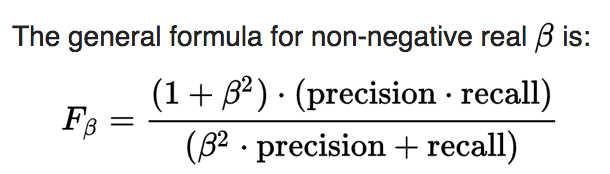


When choosing beta in your F-beta score the more you care about recall over precision the higher beta you should choose. For example, with F1 score we care equally about recall and precision with F2 score, recall is twice as important to us.
F beta by beta

With 0<beta<1 we care more about precision and so the higher the threshold the higher the F beta score. When beta>1 our optimal threshold moves toward lower thresholds and with beta=1 it is somewhere in the middle.  

**When to use it:**

    Pretty much in every binary classification problem. It is my go-to metric when working on those problems. It can be easily explained to business stakeholders.
    
 for more details see this article:[https://neptune.ai/blog/evaluation-metrics-binary-classification](http://)    
 
==>Complete evaluation will be done when we train the model on all data that we have and with the best tuned model.

<a id=6></a>
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:#1777C4; border:0' role="tab" aria-controls="home">
<center>Deploy</center></h3>

The deployment of machine learning models is the process for making models available in production environments, where they can provide predictions to other software systems.

●One of the last stages in the Machine Learning Lifecycle.

●Potentially the most challenging stage.

●Challenges of traditional software

oReliability
oReusability
oMaintainability
oFlexibility

●Additional challenges specific to Machine Learning

oReproducibility

Needs coordination of data scientists, IT teams, software developers and business professionals:

oEnsure model works reliably
oEnsure model delivers the intended result.

●Potential discrepancy between programming language in which the model is developed and the production system language.

oRe-coding the model extends the project timeline and risks lack of reproducibility

Why is Model Deployment important?

●To start using a Machine Learning Model, it needs to be effectively deployed into production, so that they can provide predictions to other software systems.

●To maximize the value of the Machine Learning Model, we need to be able to reliably extract the predictions and share them with other systems.

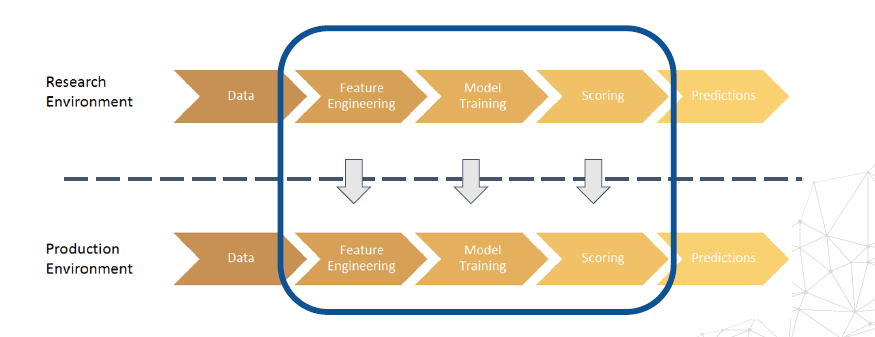

**Research Environment**

●The Research Environment is a setting with tools, programs and software suitable for data analysis and the development of machine learning models.

●Here, we develop the Machine Learning Models and identify their value.
Its done by a data scientist : i prefer work on jupyter for this phase .

**Production Environment**

●The Production Environment is a real-time setting with running programs and hardware setups that allow the organization’s daily operations.

●It’s the place where the machine learning models is actually available for business use.

●It allows organisations to show clients a “live” service.
This job is done by solid sofware+ml engineer+ devops team

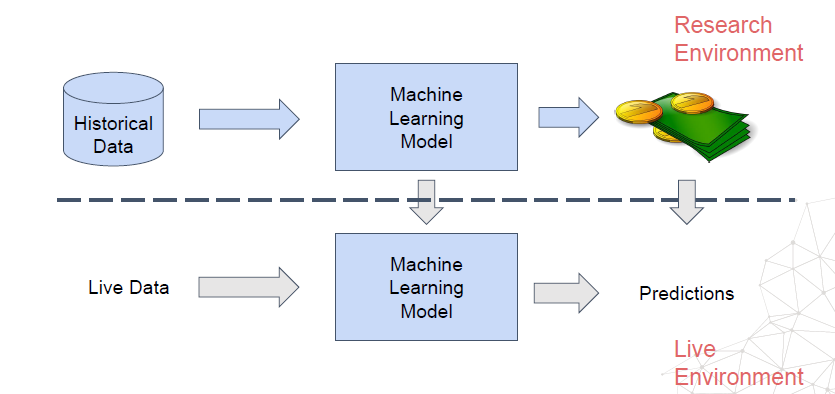

we have 4 ways to deploy models .
ML System Architectures:
1. Model embedded in application
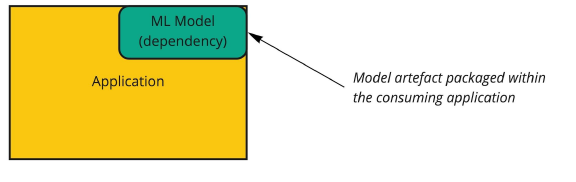
2. Served via a dedicated service
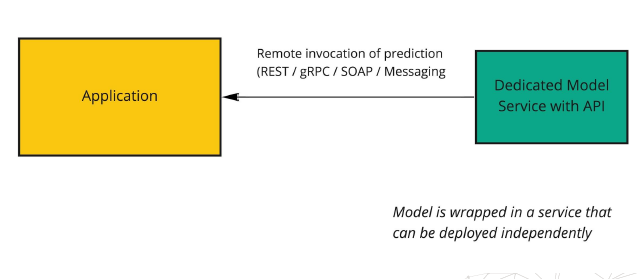
3. Model published as data(streaming)
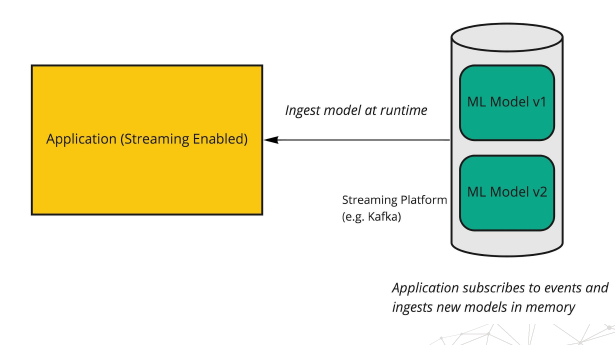
4. Batch prediction (offline process)
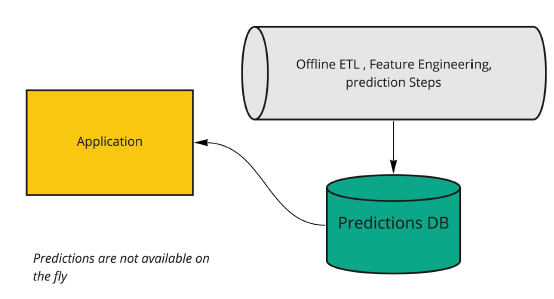

I developed  a baseline how to deploy model using Fastapi+docker on herokou :

https://github.com/DeepSparkChaker/FraudDetection_Fastapi

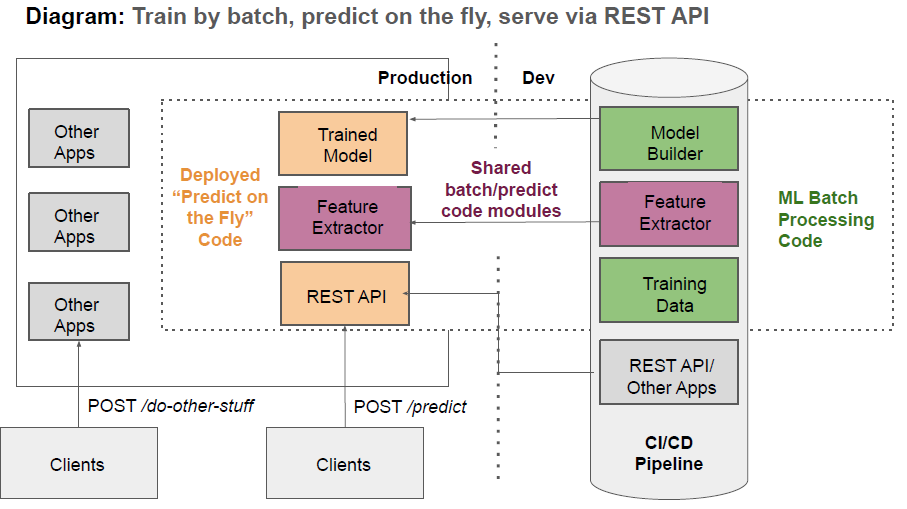
Complete deployment of our model is done here : 


<a id=7></a>
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:#1777C4; border:0' role="tab" aria-controls="home">
<center>Summary</center></h3> 

We had developed end-to-end machine learning using the CRISP_DM methodology. Work still in progress. Always keep in mind that the data science / ML project must be done as a team and iteratively in order to properly exploit our data and add value to our business. Also keep in mind that AI helps you make the decision by using the added value extracted from the data but not the accountability. So we have to keep in mind to always use a composite AI in order to make the final decision.
Don't forgot to upvote if you find it useful .

for complete deployement baseline see : 

https://github.com/DeepSparkChaker/FraudDetection_Fastapi

References :

https://developer.nvidia.com/blog/leveraging-machine-learning-to-detect-fraud-tips-to-developing-a-winning-kaggle-solution/

python guidline : 

https://gist.github.com/sloria/7001839

features  selections :

https://www.kaggle.com/sz8416/6-ways-for-feature-selection

https://pub.towardsai.net/feature-selection-and-removing-in-machine-learning-dd3726f5865c

https://www.kaggle.com/bannourchaker/1-featuresengineer-selectionpart1?scriptVersionId=72906910

Cripspdm :
https://www.kaggle.com/bannourchaker/4-featureengineer-featuresselectionpart4?scriptVersionId=73374083

Quanrile transformer : 

https://machinelearningmastery.com/quantile-transforms-for-machine-learning/

Best link for all : 

https://neptune.ai/blog/tabular-data-binary-classification-tips-and-tricks-from-5-kaggle-competitions

complete guide Stacking :

https://www.analyticsvidhya.com/blog/2021/08/ensemble-stacking-for-machine-learning-and-deep-learning/

https://neptune.ai/blog/ensemble-learning-guide

https://www.kaggle.com/prashant111/adaboost-classifier-tutorial


Missing : 

https://www.kaggle.com/dansbecker/handling-missing-values

Binning : 

https://heartbeat.fritz.ai/hands-on-with-feature-engineering-techniques-variable-discretization-7deb6a5c6e27

https://www.analyticsvidhya.com/blog/2020/10/getting-started-with-feature-engineering/

Cat :

https://innovation.alteryx.com/encode-smarter/

https://github.com/alteryx/categorical_encoding/blob/main/guides/notebooks/categorical-encoding-guide.ipynb

https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/

https://maxhalford.github.io/blog/target-encoding/


Choice of kmeans : 

https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/

Imputation : 

https://machinelearningmastery.com/knn-imputation-for-missing-values-in-machine-learning/

https://machinelearningmastery.com/iterative-imputation-for-missing-values-in-machine-learning/

Choice of  roc vs precssion_recall : 

https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/


https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/


How to tune for he futur work : 

https://www.kaggle.com/hamidrezabakhtaki/xgboost-catboost-lighgbm-optuna-final-submission

https://www.kaggle.com/bextuychiev/lgbm-optuna-hyperparameter-tuning-w-understanding



Deploy:

 https://github.com/DeepSparkChaker/Titanic_Deep_Spark/blob/main/app.py
https://github.com/Kunal-Varma/Deployment-of-ML-model-using-FASTAPI/tree/2cc0319abbec469010a5139f460004f2a75a7482
https://realpython.com/fastapi-python-web-apis/
 https://github.com/tiangolo/fastapi/issues/3373
 https://www.freecodecamp.org/news/data-science-and-machine-learning-project-house-prices/
https://github.com/tiangolo/fastapi/issues/1616
https://stackoverflow.com/questions/68244582/display-dataframe-as-fastapi-output
https://www.kaggle.com/sakshigoyal7/credit-card-customers
https://github.com/renanmouraf/data-science-house-prices    
https://towardsdatascience.com/data-science-quick-tips-012-creating-a-machine-learning-inference-api-with-fastapi-bb6bcd0e6b01
https://towardsdatascience.com/how-to-build-and-deploy-a-machine-learning-model-with-fastapi-64c505213857
https://analyticsindiamag.com/complete-hands-on-guide-to-fastapi-with-machine-learning-deployment/
https://github.com/shaz13/katana/blob/develop/Dockerfile

Best practices : 
    
https://theaisummer.com/best-practices-deep-learning-code/    
https://github.com/The-AI-Summer/Deep-Learning-In-Production/tree/master/2.%20Writing%20Deep%20Learning%20code:%20Best%20Practises

 Docker : 
 
https://github.com/dkhundley/ds-quick-tips/blob/master/012_dockerizing_fastapi/Dockerfile

 Deploy + scaling :
https://towardsdatascience.com/deploying-ml-models-in-production-with-fastapi-and-celery-7063e539a5db
https://github.com/jonathanreadshaw/ServingMLFastCelery

https://github.com/trainindata/deploying-machine-learning-models/blob/aaeb3e65d0a58ad583289aaa39b089f11d06a4eb/section-04-research-and-development/07-feature-engineering-pipeline.ipynb
